In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
filename =  'data/sales_data.csv'
df = pd.read_csv(filename, index_col=0)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [3]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


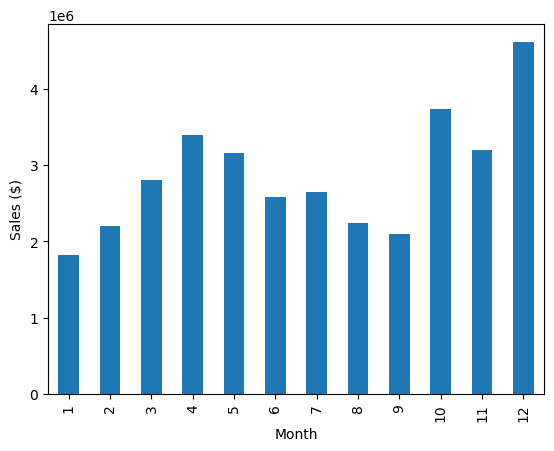

In [4]:
ax = df.groupby(['Month']).sum()['Sales'].plot(kind='bar')
plt.ylabel('Sales ($)')
plt.xlabel('Month')
plt.show()

In [5]:
wid_city = widgets.Dropdown(name='City')

In [6]:
list(df.City.unique())

['Dallas  (TX)',
 'Boston  (MA)',
 'Los Angeles  (CA)',
 'San Francisco  (CA)',
 'Seattle  (WA)',
 'Atlanta  (GA)',
 'New York City  (NY)',
 'Portland  (OR)',
 'Austin  (TX)',
 'Portland  (ME)']

In [7]:
wid_city.options = list(df.City.unique())

In [8]:
wid_city

Dropdown(options=('Dallas  (TX)', 'Boston  (MA)', 'Los Angeles  (CA)', 'San Francisco  (CA)', 'Seattle  (WA)',…

In [9]:
wid_city.value

'Dallas  (TX)'

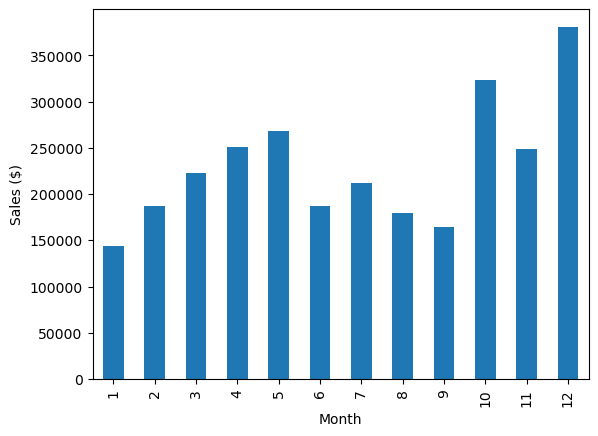

In [10]:
df_tmp = df[df['City'] == wid_city.value].copy()

ax = df_tmp.groupby(['Month']).sum()['Sales'].plot(kind='bar')
plt.ylabel('Sales ($)')
plt.xlabel('Month')
plt.show()

In [11]:
df_tmp.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
13,176569,27in 4K Gaming Monitor,1,389.99,04/16/19 19:23,"657 Hill St, Dallas, TX 75001",4,Dallas (TX),389.99
14,176570,AA Batteries (4-pack),1,3.84,04/22/19 15:09,"186 12th St, Dallas, TX 75001",4,Dallas (TX),3.84
22,176577,Apple Airpods Headphones,1,150.00,04/04/19 19:25,"260 Spruce St, Dallas, TX 75001",4,Dallas (TX),150.00
43,176596,Apple Airpods Headphones,1,150.00,04/27/19 20:11,"572 Meadow St, Dallas, TX 75001",4,Dallas (TX),150.00


In [12]:
wid_city = widgets.Dropdown(name='city')
wid_city.options = list(df.City.unique())

wid_product = widgets.Dropdown(name='product')
wid_product.options = list(df['Product'].unique())

def func(city, product):
    df_tmp = df[df['City'] == wid_city.value].copy()
    df_tmp = df_tmp[df_tmp['Product'] == wid_product.value]
    
    ax = df_tmp.groupby(['Month']).sum()['Sales'].plot(kind='bar')
    plt.ylabel('Sales ($)')
    plt.xlabel('Month')
    plt.show()
    
interactive_plot = widgets.interactive(func, city=wid_city, product=wid_product)

output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(Dropdown(description='city', options=('Dallas  (TX)', 'Boston  (MA)', 'Los Angeles  (CA)…